## **Importing librarires**

In [9]:
import numpy as np
from sklearn.model_selection import KFold
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

## Define Kernel functions

In [10]:
def rbf_transform(X, centers, gamma):
    return np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - centers[np.newaxis, :], axis=2)**2)

# Define the sigmoid and polynomial transformation functions
def cauchy_transform(x, y, gamma=0.1):
    transformed = 1 / (1 + c * np.linalg.norm(X[:, np.newaxis] - X, axis=2))
    return transformed
    
def exponential_transform(x, y, beta=0.1):
    transformed = np.exp(-c * np.linalg.norm(X[:, np.newaxis] - X, axis=2))
    return transformed

def rational_quadratic_transform(x, y, alpha=0.1):
    transformed = 1 / (1 + alpha * np.linalg.norm(X[:, np.newaxis] - X, axis=2) ** 2)
    return transformed

def inverse_multiquadric_transform(x, y, c=0.1):
    transformed = 1 / np.sqrt(1 + c * np.linalg.norm(X[:, np.newaxis] - X, axis=2) ** 2)
    return transformed

def tanh_activation(x):
    return np.tanh(x)

# Define the perceptron class

In [25]:
class Perceptron:
    def __init__(self, input_dim, activation):
        self.weights = np.random.randn(input_dim)
        self.bias = np.random.randn()
        self.activation = activation


    def predict(self, X):
        weighted_sum = np.dot(X, self.weights) + self.bias
        activation = self.activation(weighted_sum)
        return activation
    
    # def predict(self, X):
    #     z = np.dot(X, self.weights) + self.bias
    #     return self.activation(z)
    
    def train(self, X, y, learning_rate, num_epochs):
        for epoch in range(num_epochs):
            for xi, yi in zip(X, y):
                predicted = self.predict(xi)
                update = learning_rate * (yi - predicted)
                self.weights += update * xi
                self.bias += update
    
    def evaluate(self, X, y):
        accuracy = 0
        for xi, yi in zip(X, y):
            predicted = self.predict(xi)
            if predicted >= 0.5 and yi == 1:
                accuracy += 1
            elif predicted < 0.5 and yi == 0:
                accuracy += 1
        return accuracy / len(y)

## Split the dataset into features and target variable

In [26]:
# Read the data from a CSV file
data = pd.read_csv('diabetes.csv')

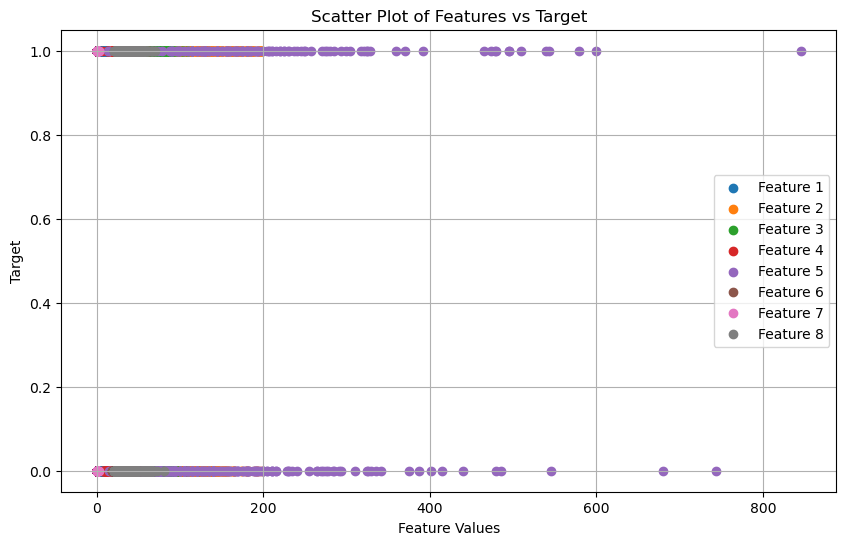

In [27]:
# Get the feature columns and the target column
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot each feature against the target variable
for i in range(X.shape[1]):
    plt.scatter(X.iloc[:, i], y, label=f'Feature {i+1}')

plt.title('Scatter Plot of Features vs Target')
plt.xlabel('Feature Values')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Convert the data to a numpy array
data = data.values

X = data[:, :-1]
y = data[:, -1]

# Manually split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * X.shape[0])

X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

## Transform the features using the RBF transformation

In [29]:
centers = np.random.randn(10, X_train.shape[1])  # Example: randomly initialize 10 centers
gamma = 0.1  # Example: set gamma value
X_train_transformed = rbf_transform(X_train, centers, gamma)
X_test_transformed = rbf_transform(X_test, centers, gamma)

# Create and train the perceptron
perceptron = Perceptron(X_train_transformed.shape[1], tanh_activation)
learning_rate = 0.1  # Example: set learning rate
num_epochs = 100  # Example: set number of epochs
perceptron.train(X_train_transformed, y_train, learning_rate, num_epochs)

# Evaluate the perceptron on the testing set
accuracy = perceptron.evaluate(X_test_transformed, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6428571428571429


### Defining parameters

In [64]:
learning_rate = 0.01  # Example: set learning rate
num_epochs = 100  # Example: set number of epochs

## Transform the features using the exponential kernel transformation

In [65]:
c = 1  # Example: set c parameter
X_train_transformed = exponential_transform(X_train, c)
X_test_transformed = exponential_transform(X_test, c)

# Create and train the perceptron
perceptron = Perceptron(X_train_transformed.shape[1], tanh_activation)
perceptron.train(X_train_transformed, y_train, learning_rate, num_epochs)

# Evaluate the perceptron on the testing set
accuracy = perceptron.evaluate(X_test_transformed, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.5454545454545454


## Transform the features using the Cauchy kernel transformation

In [66]:
c = 1  # Example: set c parameter
X_train_transformed = cauchy_transform(X_train, c)
X_test_transformed = cauchy_transform(X_test, c)

# Create and train the perceptron
perceptron = Perceptron(X_train_transformed.shape[1], tanh_activation)
perceptron.train(X_train_transformed, y_train, learning_rate, num_epochs)

# Evaluate the perceptron on the testing set
accuracy = perceptron.evaluate(X_test_transformed, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5064935064935064


## Transform the features using the rational quadratic kernel transformation

In [74]:
alpha = 1  # Example: set alpha parameter
X_train_transformed = rational_quadratic_transform(X_train, alpha)
X_test_transformed = rational_quadratic_transform(X_test, alpha)

# Create and train the perceptron
perceptron = Perceptron(X_train_transformed.shape[1], tanh_activation)
perceptron.train(X_train_transformed, y_train, learning_rate, num_epochs)

# Evaluate the perceptron on the testing set
accuracy = perceptron.evaluate(X_test_transformed, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.538961038961039


## Transform the features using the inverse multiquadric kernel transformation

In [79]:
c = 1  # Example: set c parameter
X_train_transformed = inverse_multiquadric_transform(X_train, c)
X_test_transformed = inverse_multiquadric_transform(X_test, c)

# Create and train the perceptron
perceptron = Perceptron(X_train_transformed.shape[1], tanh_activation)
perceptron.train(X_train_transformed, y_train, learning_rate, num_epochs)

# Evaluate the perceptron on the testing set
accuracy = perceptron.evaluate(X_test_transformed, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5
